# Predicting Bike Rentals in Washington D.C. using Random Forests

### Introduction

###### In this project we will be analysing data from the communal bike sharing stations in Washington, D.C. 

###### [Dataset can be found here](http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset)

###### The data shows the number of bikes used for each hour over two years. The other columns show information for the time including the weather, holiday and day.

###### We be comparing linear regression, decision trees and finally random forests predictions. 

###### Random forests is a strong alogrithm to reduce overfitting in decision trees.  This ensemble algorithm combines the predictions of multiple decision trees to create a more accurate final prediction.

### Data Preview

###### Lets take a peek at the data we will be working with.

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

%matplotlib inline

data = pd.read_csv('bike_rental_hour.csv')

In [2]:
data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


###### No missing data is a great start!

###### Here are the descriptions of the columns:
- ######  instant - A unique sequential ID number for each row
- ###### dteday - The date of the rentals
- ###### season - The season in which the rentals occurred (1 = winter, 2 = spring, 3 = summer, 4 = fall)
- ###### yr - The year the rentals occurred (0 = 2011, 1 = 2012)
- ###### mnth - The month the rentals occurred (1 to 12 = Jan to Dec)
- ###### hr - The hour the rentals occurred (Of the 24 hours a day)
- ###### holiday - Whether or not the day was a holiday (0 = no, 1 = yes)
- ###### weekday - The day of the week (as a number, 0 to 6)(0 is Sunday, 6 is Saturday)
- ###### workingday - Whether or not the day was a working day (0 = no, 1 = yes)
- ###### weathersit - The weather (as a categorical variable) (1= clear to partly cloudy, 2 = mist to misty and cloudy, 3 = light rain + clouds to light snow, 4 = Heavy Rain)
- ###### temp - The temperature, on a normalised scale of 0 to 1 (representing -8°C to +39°C)
- ###### atemp - The adjusted temperature. The normalised 'felt' temperature including effects like wind chill factor.
- ###### hum - The humidity, on a 0-1 scale (from 0 to 100% humidity)
- ###### windspeed - The wind speed, on a 0-1 scale (from 0 to 67mph)
- ###### casual - The number of casual riders (people who hadn't previously signed up with the bike sharing program)
- ###### registered - The number of registered riders (people who had already signed up)
- ###### cnt - The total number of bike rentals (casual + registered)

###### Here is a preview of the first 10 rows:

In [3]:
data.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


### Exploring The Target Column

###### Our target column is the 'cnt' column which represents the total number of bike rentals. (this is the sum of registered uses + the casual uses)

###### Initial thoughts before exploring we might expect:
 - ###### low rentals in poor weather (rain, snow, cold, high wind) 
 - ###### low rentals in typical sleeping hours (10pm to 6am)
 - ###### low rentals during the working week, but perhaps this is untrue for the 'rush hour'
 
###### Things that are more difficult to predict would be the dates:
 - ###### Perhaps some days are bike festivals or promotional days by bike rental companies
 - ###### Perhaps tourists are more likely to rent bikes so may increase during weekend or holidays
 - ###### Hour - For the casual user do people prefer to cycle in the morning afternoon or evening?
 
###### Lets look at a histogram of the cnt column:

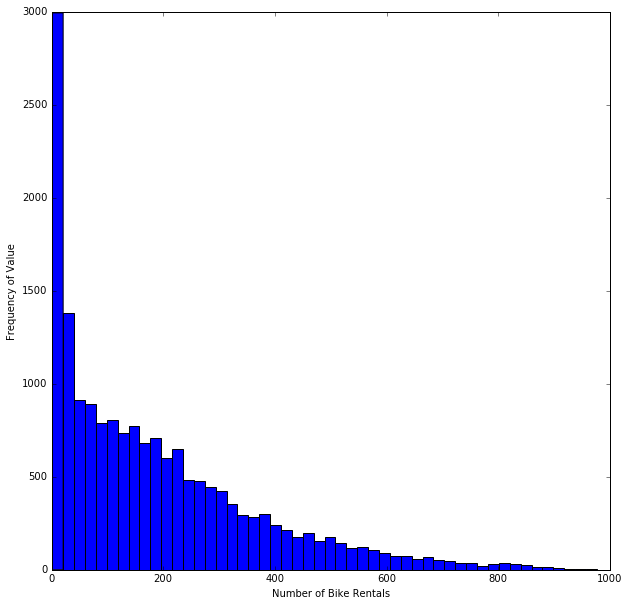

In [4]:
plt.figure(figsize = (10,10))
plt.hist(data['cnt'], bins= 50)
plt.xlabel('Number of Bike Rentals')
plt.ylabel('Frequency of Value')
plt.show()

###### Another way to view this is the value counts:

In [5]:
data['cnt'].value_counts()
#Displays the value in the count row, followed by the frequency of those values#

5      260
6      236
4      231
3      224
2      208
7      198
8      182
1      158
10     155
11     147
9      128
12     122
13     113
16     105
17     102
14      97
20      91
21      90
26      90
15      89
28      85
23      81
18      79
24      76
31      75
25      72
27      71
19      69
32      68
36      67
      ... 
754      1
977      1
913      1
897      1
865      1
849      1
708      1
804      1
792      1
948      1
728      1
696      1
967      1
863      1
871      1
775      1
727      1
870      1
854      1
806      1
774      1
758      1
630      1
917      1
901      1
725      1
709      1
661      1
629      1
887      1
Name: cnt, Length: 869, dtype: int64

###### The histogram bins are 20 units wide, so are summing up 0 to 20 users in the first column.

###### From the histogram plot and value counts we can see the rows (which are individual hours) that have 20 or less users are disproportionately high. 

###### The greater the number of users the less frequent the event occurs. Such events that have 700 + uses are only occurring once. This will make for difficult predictions

###### Lets see how many uses (because users are not identifiable here and are quite likely to have duplicates) there were:

In [6]:
data['cnt'].sum()

3292679

###### 3.3 Million bike uses in the two years of data.

###### Lets preview the correlation with the uses count

In [7]:
data.corr()['cnt'].sort_values()

hum          -0.322911
weathersit   -0.142426
holiday      -0.030927
weekday       0.026900
workingday    0.030284
windspeed     0.093234
mnth          0.120638
season        0.178056
yr            0.250495
instant       0.278379
hr            0.394071
atemp         0.400929
temp          0.404772
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

###### The weakest correlations are with the holiday, weekday, working day, windspeed and month.

###### Despite having the best correlation we must not use 'casual' and 'registered' in our machine learning, this is because the sum of these is the actual target! (Our model is supposed to predict number of people given a date / weather condition and not simply predict the addition of two numbers.)

###### Equally valuable here is to see correlation with 'casual' and 'registered' separately to see if there are different factors influencing usage:

In [8]:
data.corr()['registered'].sort_values().drop('casual')

hum          -0.273933
weathersit   -0.120966
holiday      -0.047345
weekday       0.021578
windspeed     0.082321
mnth          0.122273
workingday    0.134326
season        0.174226
yr            0.253684
instant       0.282046
atemp         0.332559
temp          0.335361
hr            0.374141
cnt           0.972151
registered    1.000000
Name: registered, dtype: float64

In [9]:
data.corr()['casual'].sort_values().drop('registered')

hum          -0.347028
workingday   -0.300942
weathersit   -0.152628
holiday       0.031564
weekday       0.032721
mnth          0.068457
windspeed     0.090287
season        0.120206
yr            0.142779
instant       0.158295
hr            0.301202
atemp         0.454080
temp          0.459616
cnt           0.694564
casual        1.000000
Name: casual, dtype: float64

###### Now lets make this easier to compare by viewing the differences.

In [10]:
(data.corr()['casual'].sort_values().drop('registered') 
- data.corr()['registered'].sort_values().drop('casual')).sort_values()

workingday   -0.435268
cnt          -0.277587
instant      -0.123750
yr           -0.110906
hum          -0.073095
hr           -0.072939
season       -0.054019
mnth         -0.053816
weathersit   -0.031662
windspeed     0.007966
weekday       0.011144
holiday       0.078909
atemp         0.121521
temp          0.124255
casual             NaN
registered         NaN
dtype: float64

###### A positive number above means that the correlation is more postive for the casual user.

###### Now we can see some fairly interesting observations:
- ###### The greatest difference is in the 'workingday' column. Here registered users were positively correlated (0.13) and casual users negatively correlated (-0.3).
- ###### The reverse trend is seen in atemp or temp. Warm weather is slightly more influencial in attracting casual bike riders than registered.
- ###### Correlation with count is greatest (at 0.97) for registered users compared to casual (at 0.69), this is to say that there are more registered uses than casual on average:

In [11]:
data['registered'].sum() - data['casual'].sum()

2052645

###### Out of the 3.3million bike uses, 2.1 million are from registered users

### Feature Engineering - Hour

###### The correlation is treating each value as unique and plotting the linear correlation, however the best linear correlations are when the data is ordered sensibly.

###### The 24 hour clock is ordered, but as we stated earlier we might expect very low usage at night time.

###### The feature engineering part involves interpretation of how to treat these columns.

###### Lets investigate the hour ('hr') column.

In [12]:
hour_to_counts = data.groupby(by = 'hr')['cnt'].mean().sort_values(ascending = False)
hour_to_counts

hr
17    461.452055
18    425.510989
8     359.011004
16    311.983562
19    311.523352
13    253.661180
12    253.315934
15    251.233196
14    240.949246
20    226.030220
9     219.309491
7     212.064649
11    208.143054
10    173.668501
21    172.314560
22    131.335165
23     87.831044
6      76.044138
0      53.898072
1      33.375691
2      22.869930
5      19.889819
3      11.727403
4       6.352941
Name: cnt, dtype: float64

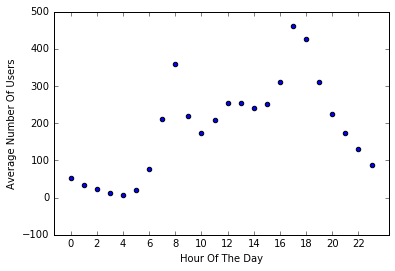

In [13]:
plt.xticks(np.arange(0, 23, 2))
plt.scatter(x= hour_to_counts.index , y= hour_to_counts.values)
plt.xlabel('Hour Of The Day')
plt.ylabel('Average Number Of Users')
plt.show()

###### Average seems to show distinctive rises and falls

###### Lets see the distribution of values in a violin plot (height is range of the variables, width indicates the distribution of values in the range):

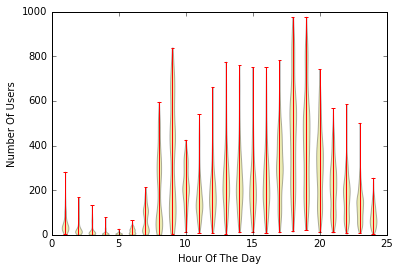

In [14]:
violin_data = [] 
for i in range(0,24):
    violin_data.append(data[data['hr'] == i]['cnt'])
plt.violinplot(violin_data)
plt.xlabel('Hour Of The Day')
plt.ylabel('Number Of Users')
plt.show()

###### Now how best to use this information?

###### Its is clear from the wide range of values in each hour of the violin plot that we can expect a low predictive power.

###### We can group (or 'bin') values together, and by preserving a similar order as above achieve higher correlation.

###### Frustratingly 8am (and 20 (8pm)) seem to be uniquely high compared to hours next to it, we will lose some correlation here when we bin it with similar hours. However there is a great separation with the remaining numbers.

###### Lets assign numbers for the hour groups as follows:
- ###### 1 for hours 0 to 6 (twilight)
- ###### 2 for hours 20 to 23 (dusk)
- ###### 3 for hours 7 to 11 (morning)
- ###### 4 for hours 12 to 15 (afternoon)
- ###### 5 for hours 16 to 19 (rush hour)

In [15]:
bins = [-1, 6, 11, 15, 19, 24]
labels = [1, 3, 4, 5, 2]
data['hr_label'] = pd.cut(data['hr'], bins=bins, labels=labels)
data[['hr','hr_label']][:25]

,hr,hr_label
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1
5,5,1
6,6,1
7,7,3
8,8,3
9,9,3


###### Quick plot to show our binned grouping:

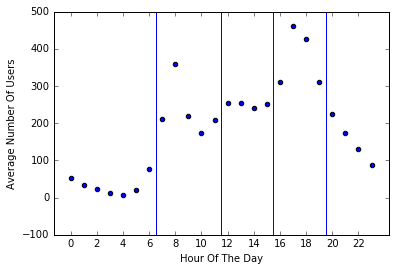

In [16]:
plt.xticks(np.arange(0, 23, 2))
plt.scatter(x= hour_to_counts.index , y= hour_to_counts.values)
plt.xlabel('Hour Of The Day')
plt.ylabel('Average Number Of Users')
plt.axvline(x = 6.5)
plt.axvline(x = 11.5)
plt.axvline(x = 15.5)
plt.axvline(x = 19.5)

plt.show()

In [17]:
#Need to convert our bin numbers to int before running correlation#
data['hr_label'] = data['hr_label'].astype(int)

In [18]:
print(data.corr()['cnt']['hr'])
print(data.corr()['cnt']['hr_label'])

0.39407149778293477
0.645164760162967


###### Our correlation has now nearly doubled. This should greatly improve our linear regression.

### Feature Engineering - Month and Season

###### Lets now explore the month and season columns.

In [19]:
#For each month find the average count#
month_to_counts = data.groupby(by = 'mnth')['cnt'].mean().sort_values(ascending = False)
month_to_counts

mnth
9     240.773138
6     240.515278
8     238.097627
7     231.819892
5     222.907258
10    222.158511
4     187.260960
11    177.335421
3     155.410726
12    142.303439
2     112.865026
1      94.424773
Name: cnt, dtype: float64

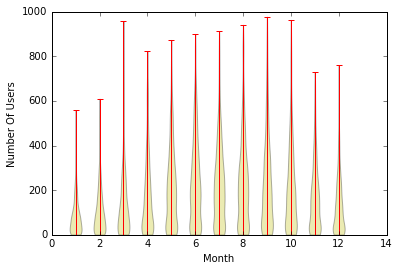

In [20]:
month_data = []
for i in range(1,13):
    month_data.append(data[data['mnth'] == i]['cnt'])
plt.violinplot(month_data)
plt.xlabel('Month')
plt.ylabel('Number Of Users')
plt.show()

###### A wide range of results per month makes for poor predictions.

###### Averages Are Best visualised in graph format:

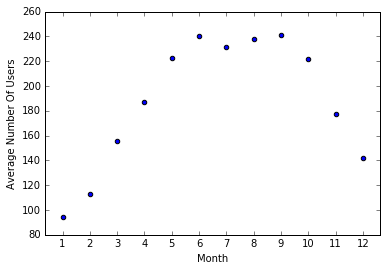

In [21]:
plt.xticks(np.arange(0, 13, 1))
plt.scatter(x= month_to_counts.index , y= month_to_counts.values)
plt.xlabel('Month')
plt.ylabel('Average Number Of Users')
plt.show()

###### And how is this grouped with the season column?

In [22]:
month_to_season = data.groupby(by = 'mnth')['season'].min().sort_values(ascending = False)
month_to_season

mnth
11    4
10    4
9     3
8     3
7     3
6     2
5     2
4     2
12    1
3     1
2     1
1     1
Name: season, dtype: int64

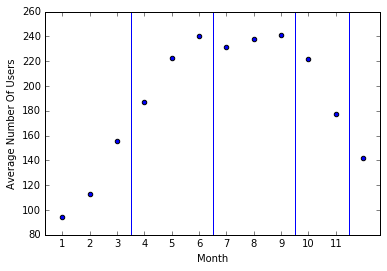

In [23]:
plt.xticks(np.arange(0, 12, 1))
plt.scatter(x= month_to_counts.index , y= month_to_counts.values)
plt.xlabel('Month')
plt.ylabel('Average Number Of Users')
plt.axvline(x = 3.5)
plt.axvline(x = 6.5)
plt.axvline(x = 9.5)
plt.axvline(x = 11.5)

plt.show()

###### Grouping above is 1,2,3,4,1. Doesnt make great sense in linear regression models.

###### Proposed upgrade to high, medium and low season to better reflect uses:

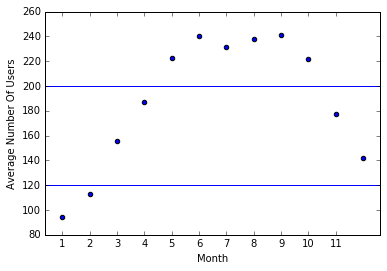

In [24]:
plt.xticks(np.arange(0, 12, 1))
plt.scatter(x= month_to_counts.index , y= month_to_counts.values)
plt.xlabel('Month')
plt.ylabel('Average Number Of Users')
plt.axhline(y = 120)
plt.axhline(y = 200)
plt.show()

###### Here we have split the data set into three groups:
 - ###### Janurary and Feburary are low season (1)
 - ###### March, April, November, December are medium season (2)
 - ###### May to October are high season (3)
 
###### Lets codify this now:

In [25]:
bins = [-1, 2, 4, 10, 12]
labels = [1, 2, 3, 4]
data['high_low_season_label'] = pd.cut(data['mnth'], bins=bins, labels=labels)
data['high_low_season_label'].replace(4,2, inplace= True)
data[['mnth','high_low_season_label']].sample(5)

,mnth,high_low_season_label
3975,6,3
9757,2,1
1548,3,2
3407,5,3
7052,10,3


In [26]:
data['high_low_season_label'] = data['high_low_season_label'].astype(int)
print(data.corr()['cnt']['mnth'])
print(data.corr()['cnt']['high_low_season_label'])

0.12063776021314714
0.2654581805348883


###### Over double the correlation with a little feature engineering.

### Feature Engineering - Weather

###### There are 4 columns of interest here the weather conditions, the adjusted ('felt') temperature, humidity and windspeed.

###### Lets dive right in and see the distribution of data in these columns

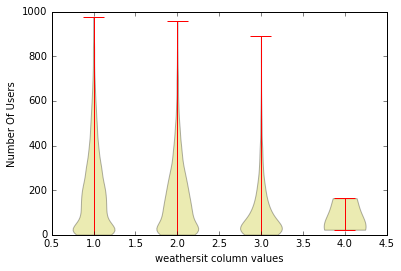

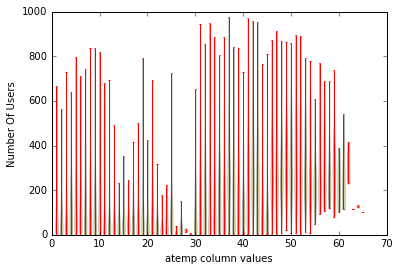

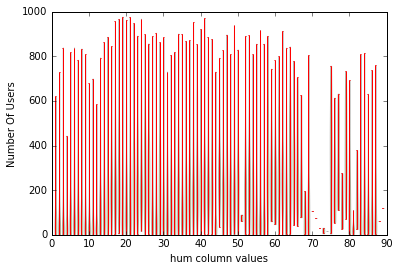

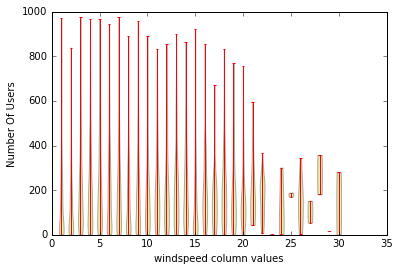

In [27]:
weather_columns = ['weathersit', 'atemp', 'hum', 'windspeed']

for column in weather_columns:
    violin_data = []
    for value in (data[column].unique()):
        violin_data.append(data[data[column] == value]['cnt'])
    plt.violinplot(violin_data)
    plt.xlabel('{} column values'.format(column))
    plt.ylabel('Number Of Users')
    plt.show()

###### This is an information overload. Only with the weathersit column can we make any real observations. 

###### At the worst weather condition (heavy rain) the distribution is significantly affected with no hours above 200 uses. 

###### We should really expect the same profiles in all 4 conditions, just different heights. The flat top of weathersit 4 is very bizarre. Perhaps there is a limit set by the holding company in extreme weather.

###### Lets now look at the averages for more insight:

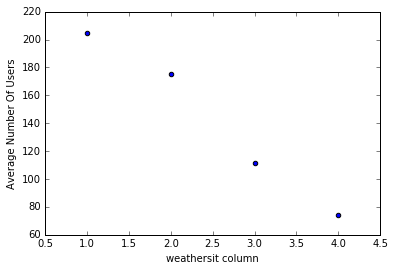

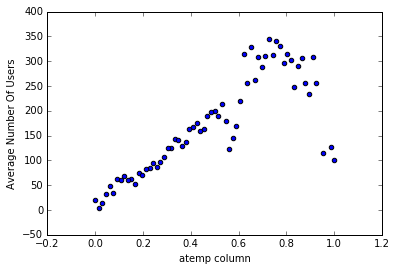

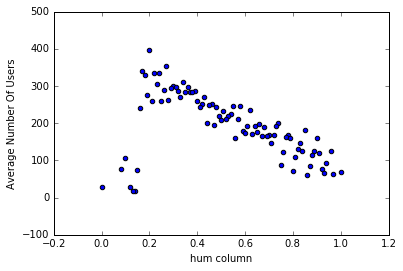

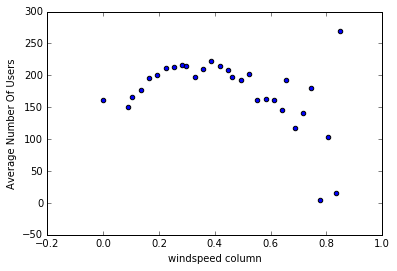

In [28]:
weather_columns = ['weathersit', 'atemp', 'hum', 'windspeed']

for column in weather_columns:
    weather_to_counts = data.groupby(by = column)['cnt'].mean().sort_values(ascending = False)
    plt.scatter(x = weather_to_counts.index, y = weather_to_counts.values)
    plt.xlabel('{} column'.format(column))
    plt.ylabel('Average Number Of Users')
    plt.show()

###### Weathersit is showing a strongly negative trend. The worse the weather condition the less uses there will be.

###### Humidity and adjusted temperature are almost mirror images. They look like distorted normal distribution curves. There is a maximum on one side of the graph with a sharp decline on one side and slow decline on the other.

###### That is to say 'perfect conditions' are at 0.2 humidity and 0.8 atemp (20% humidity and 29.6°C). Does this temperature seem to high for perfect? Lets review this:

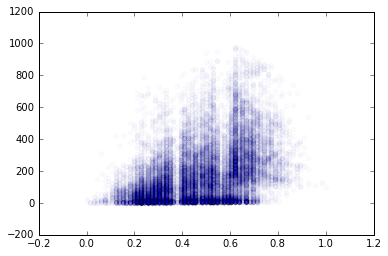

In [29]:
plt.scatter(x = data['atemp'], y=data['cnt'], alpha = 0.015)

###### Perhaps on average there are more uses at 0.8, but these events are less frequent than the 0.2 to 0.7 range. Lets look at the distribution of data

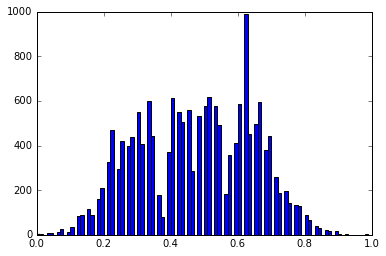

In [30]:
plt.hist(data['atemp'], bins = 100)
plt.show()

In [31]:
data.groupby(by = 'atemp')['cnt'].count().sort_values(ascending= False).head(5)

atemp
0.6212    988
0.5152    618
0.4091    614
0.3333    600
0.6667    593
Name: cnt, dtype: int64

###### Interestingly there is a massive disproportionate jump in hours recored at atemp of 0.6212. This is approximately 21°C.

###### This is really unexpected. We would expect a smooth curve profile. 

###### Atemp should simply be an adjustment from the temp column to represent the 'felt' temperature

###### Do we see the same issues in the temp column?

In [32]:
data.groupby(by = 'temp')['cnt'].count().sort_values(ascending= False).head(5)

temp
0.62    726
0.66    693
0.64    692
0.70    690
0.60    675
Name: cnt, dtype: int64

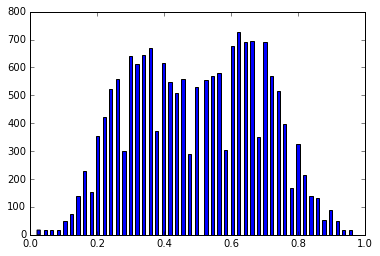

In [33]:
plt.hist(data['temp'], bins = 100)
plt.show()

###### A far more sensible distribution curve. Without more information it seems difficult to conceive that the atmospheric effects are raising (by 36%) the maximum frequency for 'atemp' in this disproportionate manner.

###### Without further information we shall not use the 'atemp' column and instead continue with 'temp'

### Feature Engineering - Days

###### Lets review the weekday, workingday and holiday data

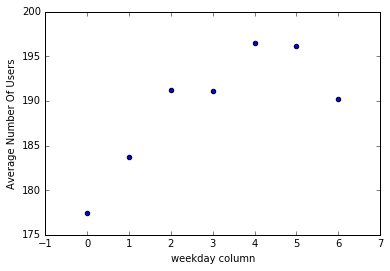

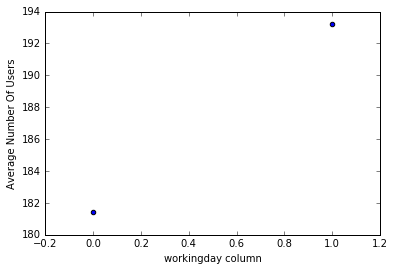

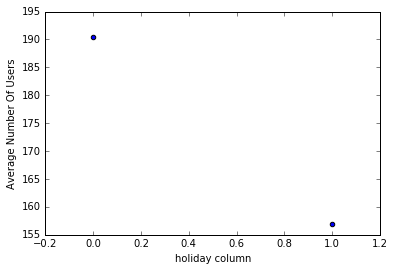

In [34]:
day_type_columns = ['weekday', 'workingday', 'holiday']

for column in day_type_columns:
    day_to_counts = data.groupby(by = column)['cnt'].mean().sort_values(ascending = False)
    plt.scatter(x = day_to_counts.index, y = day_to_counts.values)
    plt.xlabel('{} column'.format(column))
    plt.ylabel('Average Number Of Users')
    plt.show()

###### Holiday and workingday are binary choices. No engineering required.

###### Weekdays are arranged from Sunday (at 0) to Saturday (at 6), there is actually fairly good linearity here. Saturday seems like a large drop from Friday. Lets see why:

In [35]:
data.groupby(by = 'weekday')[['cnt','registered','casual']].mean().sort_values(by = 'cnt', ascending = False)

,cnt,registered,casual
weekday,,,
4,196.436665,171.564144,24.872521
5,196.135907,164.677121,31.458786
2,191.238891,167.658377,23.580514
3,191.130505,167.971313,23.159192
6,190.209793,128.962978,61.246815
1,183.744655,155.191206,28.553449
0,177.468825,121.305356,56.163469


###### There is a large drop (on average) in registered uses from Friday to Saturday of ~40 users. And although casual uses nearly doubles from Friday to Saturday (from 31 to 61), this is not sufficient to compensate for the registered reduction.

###### Peak of registered users is on Thursday. Presumably Friday night many people have travel / enterainment plans and dont require the bicycle. Monday perhaps some users are recovering from the weekend plans. Tuesday to Thursday is broadly similar in uses.

###### The causes are just speculation and not too relevant in this project, so time to move on to the models:

### Creating A Linear Regression Model

###### We will be using Linear Regression as a comparison to demonstrate the effectiveness of Regression using Decision Tree(s).

###### Our target result is the number of users in a given hour. This data is continuous so a suitable metric to use is mean squared error (MSE)

In [36]:
predictor_columns = ['hr_label','mnth','season','weathersit', 'temp', 'hum', 'windspeed', 'workingday', 'weekday', 'holiday', 'high_low_season_label']
linear_model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(data[predictor_columns], data['cnt'], test_size = 0.2, random_state = 0)

In [37]:
linear_model.fit(X_train, y_train)
predictions = linear_model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(mse)

15915.201495043528


###### Error is high. Lets preview some of the data to see where it went so wrong

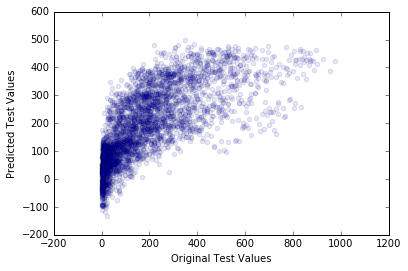

In [38]:
fig, ax = plt.subplots()
ax.scatter(x= y_test, y= predictions, alpha = 0.1)
plt.xlabel('Original Test Values')
plt.ylabel('Predicted Test Values')
plt.show()

###### An ideal distribution would be all points on a straight line from points [0,0] to [1000,1000].

###### Clearly we are not achieving anything like this and most values show a great reduction in the expected results

###### Negative results are being predicted. Not possible.

###### Below we can see the:
- ###### The top 5 largest differences between actual and predicted
- ###### The top 5 largest predictions
- ###### The lowest 5 predictions

In [39]:
linear_errors = pd.DataFrame(y_test, columns = ['cnt'])
linear_errors['predicted'] = predictions
linear_errors['difference'] = np.abs(linear_errors['predicted'] - linear_errors['cnt'])
linear_errors.sort_values(by='difference', ascending = False).head()

,cnt,predicted,difference
15579,835,256.373186,578.626814
10622,957,385.357779,571.642221
16621,729,160.773290,568.226710
14773,977,424.066594,552.933406
15075,805,254.468428,550.531572


In [40]:
linear_errors.sort_values(by='predicted', ascending = False).head()

,cnt,predicted,difference
12971,351,497.146389,146.146389
12947,387,482.399356,95.399356
4794,221,481.391966,260.391966
12779,320,480.813954,160.813954
14483,528,477.841333,50.158667


In [41]:
linear_errors.sort_values(by='predicted').head()

,cnt,predicted,difference
9650,24,-132.877317,156.877317
17212,13,-117.861548,130.861548
9150,2,-111.586228,113.586228
9125,13,-99.203609,112.203609
9485,17,-98.592887,115.592887


###### Above we can see that the highest predicted values from linear regression was 497.146389

###### Nevermind that we can't have fractions of users, the issue lies with the fact that we have seen up to 977 users. This gives a huge difference. 

###### Perhaps even worse is the fact we are predicting negative results! This is clearly not possible!

###### And......because the calculated error is squared, this difference is even greater!

### Creating The Decision Tree

In [42]:
tree_regress = DecisionTreeRegressor(min_samples_split =2)
tree_regress.fit(X_train, y_train)
tree_predictions = tree_regress.predict(X_test)
mse_basic_tree = mean_squared_error(y_test, tree_predictions)
print(mse_basic_tree)

16323.717143268124


###### Error is actually higher. This will need some investigating.

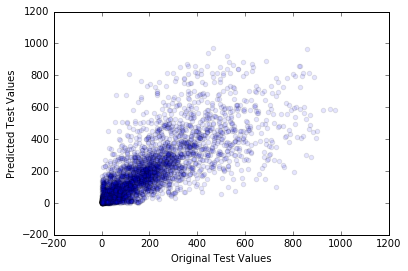

In [43]:
fig, ax = plt.subplots()
ax.scatter(x= y_test, y= tree_predictions, alpha = 0.1)
plt.xlabel('Original Test Values')
plt.ylabel('Predicted Test Values')
plt.show()

###### Below we can see the:
- ###### The top 5 largest differences between actual and predicted
- ###### The top 5 largest predictions

In [44]:
tree_errors = pd.DataFrame(y_test, columns = ['cnt'])
tree_errors['predicted'] = tree_predictions
tree_errors['difference'] = np.abs(tree_errors['predicted'] - tree_errors['cnt'])
tree_errors.sort_values(by='difference', ascending = False).head()

,cnt,predicted,difference
15890,115,806.0,691.0
15723,728,101.0,627.0
2365,61,677.0,616.0
15075,805,193.0,612.0
1846,165,762.0,597.0


In [45]:
tree_errors.sort_values(by='predicted', ascending = False).head()

,cnt,predicted,difference
14243,467,970.0,503.0
15781,858,963.0,105.0
15587,446,943.0,497.0
15731,524,922.0,398.0
13934,686,891.0,205.0


###### This tree does at least have predictions up to 967 (which is close to our extreme values) But the differences are now larger. The tree is overfitting based on the training data.

###### The graph shows we somewhat have a linear relationship between original and predicted. More importantly is our decision tree is not generating negative predictions.

### Tweaking The Decision Tree

###### For a quick demonstration of the method behind Random Trees, we will create a decision tree function that takes in 4 values (a,b,c,d) as parameters (rules) for creating the tree:

- ###### a = Maximum Depth
- ###### b = Minimum Samples Required To Split a Node
- ###### c = Min Samples In A Leaf
- ###### d = Maximum Leaf Nodes respectively

In [46]:
def DecisionTreeCreator(a, b, c, d):
    X_train, X_test, y_train, y_test = train_test_split(data[predictor_columns], data['cnt'], test_size = 0.2, random_state = 0)
    tree_regress = DecisionTreeRegressor(max_depth = a, min_samples_split = b,
                                        min_samples_leaf = c, max_leaf_nodes = d)
    tree_regress.fit(X_train, y_train)
    tree_predictions = tree_regress.predict(X_test)
    mse_tree = mean_squared_error(y_test, tree_predictions)
    tree_errors = pd.DataFrame(y_test, columns = ['cnt'])
    tree_errors['predicted'] = tree_predictions
    tree_errors['difference'] = np.abs(tree_errors['predicted'] - tree_errors['cnt'])
    temp_tree_dataframe = tree_errors.sort_values(by='difference', ascending = False).head()
    print('For variables {}, {} ,{}, {} the mean squared error was {}'.format(a,b,c,d,mse_tree))

In [47]:
#Random seed used for repeatability only#
np.random.seed(1)
for i in range(5):
    #create 5 random integers between 2 and 10#
    a, b, c, d = np.random.randint(2, 10, size = 4)
    DecisionTreeCreator(a, b, c, d)

For variables 7, 5 ,6, 2 the mean squared error was 22928.326114677056
For variables 3, 5 ,7, 9 the mean squared error was 14337.975222668976
For variables 2, 3 ,6, 9 the mean squared error was 14969.137903755653
For variables 6, 8 ,3, 4 the mean squared error was 17516.58970607434
For variables 8, 7 ,4, 6 the mean squared error was 15474.589804754429


###### Lowest error seen here is by raising the 'max_leaf_nodes'

In [48]:
np.random.seed(1)
for i in range(7):
    #create 5 random integers between 2 and 10#
    a,b,c = 3,3,3
    d = 13 + i
    DecisionTreeCreator(a, b, c, d)

For variables 3, 3 ,3, 13 the mean squared error was 13942.516096029993
For variables 3, 3 ,3, 14 the mean squared error was 13929.106051338153
For variables 3, 3 ,3, 15 the mean squared error was 13921.030558127797
For variables 3, 3 ,3, 16 the mean squared error was 13913.653646822506
For variables 3, 3 ,3, 17 the mean squared error was 13913.653646822506
For variables 3, 3 ,3, 18 the mean squared error was 13913.653646822506
For variables 3, 3 ,3, 19 the mean squared error was 13913.653646822506


###### Ideal number of maximum_leaf_nodes is not less than 16 with an error of 14051

In [49]:
np.random.seed(1)
for i in range(5):
    #create 10 random integers between 2 and 10#
    a, b, c = np.random.randint(2, 2000, size = 3)
    d = 16
    DecisionTreeCreator(a, b, c, d)

For variables 1063, 237 ,1934, 16 the mean squared error was 17988.426516454183
For variables 1793, 907 ,717, 16 the mean squared error was 14309.817118612249
For variables 849, 962 ,146, 16 the mean squared error was 13616.790650461153
For variables 1998, 1609 ,751, 16 the mean squared error was 14319.571898943967
For variables 1416, 1307 ,1204, 16 the mean squared error was 15394.119979668272


###### Making large variation in the other variables is not having significant effects.

###### Lowest error is at 13616.

###### Next lets try random forests.

### Random Forests

###### This ensemble algorithm combines the predictions of multiple decision trees to create a more accurate final prediction.

In [50]:
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)
random_forest_predictions = random_forest.predict(X_test)
mse_random_forest = mean_squared_error(y_test, random_forest_predictions)
print(mse_random_forest)

10169.928235267103


###### The error rate is 60% of that seen in linear regression.

In [51]:
random_forest_errors = pd.DataFrame(y_test, columns = ['cnt'])
random_forest_errors['predicted'] = random_forest_predictions
random_forest_errors['difference'] = np.abs(random_forest_errors['predicted'] - random_forest_errors['cnt'])
print(random_forest_errors.sort_values(by='difference', ascending = False).head())

       cnt  predicted  difference
15315  785      199.7       585.3
15579  835      274.1       560.9
13587  788      238.9       549.1
14427  808      260.3       547.7
14619  646      138.2       507.8


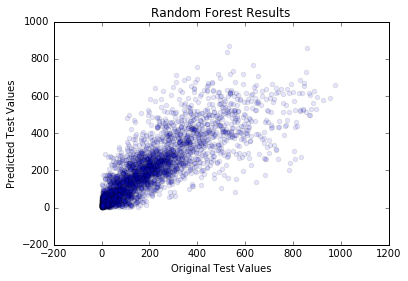

In [52]:
fig, ax = plt.subplots()
ax.scatter(x= y_test, y= random_forest_predictions, alpha = 0.1)
plt.title('Random Forest Results')
plt.xlabel('Original Test Values')
plt.ylabel('Predicted Test Values')
plt.show()

###### Compare this to the decision tree results from earlier:

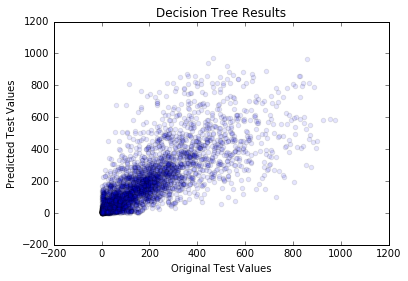

In [53]:
fig, ax = plt.subplots()
ax.scatter(x= y_test, y= tree_predictions, alpha = 0.1)
plt.title('Decision Tree Results')
plt.xlabel('Original Test Values')
plt.ylabel('Predicted Test Values')
plt.show()

###### The greatest differences (between count and predicted) are smaller for the Random Forest regression

###### All methods are underpredicting, this is least pronounced in random forests.

### Summary

###### Linear regression is a powerful common technique for modelling. It lacks behind other methods when features (columns) do not show clear linear relationships with the target.

###### As we have seen in many features here (month, temperature, windspeed, weekday) the relationship shows a maxima at one point and decreases either direction from this peak. These are distinctly non-linear.

###### Decision trees are good for these tasks as they can work out these non-linear relationships (ie if between Tuesday to Thursday, the registered (and count) uses are high)

###### Random Forests build on the decision trees by averaging multiple trees with wide variety of parameters. By averaging this forest of trees and through use of [bootstrapping](https://en.wikipedia.org/wiki/Bootstrap_aggregating) the accuracy of the model can be improved.

### Bonus

###### While progressing through this project into random forests there was an additional thought:

- ###### Casual and registered are in reality two different types of customers with different correlations, can we model linear regression separately then use the average as a predictor?

###### Lets find out:

### Dual Linear Regression

###### First lets model the two Linear Regressions and average the predictions.

In [54]:
casual_linear_predictions = np.empty(shape = predictions.shape)
registered_linear_predictions = np.empty(shape = predictions.shape)
for column in ['casual', 'registered']:
    X_train, X_test, y_train, y_test = train_test_split(data[predictor_columns], data[column], test_size = 0.2, random_state = 0)
    linear_model.fit(X_train, y_train)
    if column == 'casual':
        casual_linear_predictions = linear_model.predict(X_test)
    else:
        registered_linear_predictions = linear_model.predict(X_test)
linear_means = np.mean([[casual_linear_predictions], [registered_linear_predictions]], axis =0)
mse_dual_linear = mean_squared_error(y_test, linear_means[0])
mse_dual_linear

17634.65455743989

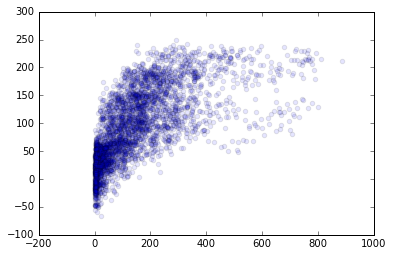

In [55]:
fig, ax = plt.subplots()
ax.scatter(x= y_test, y= linear_means[0], alpha = 0.1)
plt.show()

###### Still negative values are being predicted, and the predictions are mostly smaller than the reality.

###### Clearly the accuracy can be improved by setting these negative predictions to 0

In [56]:
casual_linear_predictions_no_negatives = np.empty(shape = predictions.shape)
registered_linear_predictions_no_negatives = np.empty(shape = predictions.shape)
for column in ['casual', 'registered']:
    X_train, X_test, y_train, y_test = train_test_split(data[predictor_columns], data[column], test_size = 0.2, random_state = 0)
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)
    if column == 'casual':
        casual_linear_predictions_no_negatives = linear_model.predict(X_test)
    else:
        registered_linear_predictions_no_negatives = linear_model.predict(X_test)
# Replace negative predictions with 0#
casual_linear_predictions_no_negatives[casual_linear_predictions_no_negatives<0] = 0
registered_linear_predictions_no_negatives[registered_linear_predictions_no_negatives<0] = 0

linear_means_no_negatives = np.mean([[casual_linear_predictions_no_negatives], [registered_linear_predictions_no_negatives]], axis =0)
mse_dual_linear_no_negatives = mean_squared_error(y_test, linear_means_no_negatives[0])

mse_dual_linear_no_negatives

17543.03955009062

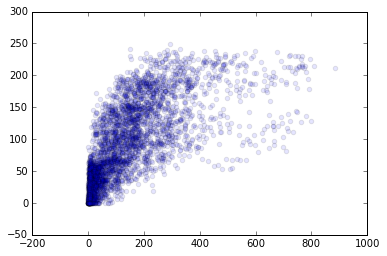

In [57]:
fig, ax = plt.subplots()
ax.scatter(x= y_test, y= linear_means_no_negatives[0], alpha = 0.1)
plt.show()

###### Prediction mean squared error of 17543 is actually worse than that seen in predicting count through linear regression (with an error of 15915). 